In [1]:
#A timeseries is a sequence

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style = 'seaborn')
%matplotlib inline


In [38]:
df = pd.read_csv(r"C:\Users\hp\PycharmProjects\stock_models\data\NFLX.csv")

In [39]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-11,96.190002,96.870003,94.300003,94.669998,94.669998,13276200
1,2016-07-12,95.070000,96.720001,94.089996,95.970001,95.970001,11617400
2,2016-07-13,96.260002,96.720001,94.800003,96.430000,96.430000,8768900
3,2016-07-14,97.000000,98.269997,96.800003,98.019997,98.019997,9885000
4,2016-07-15,98.519997,98.699997,97.410004,98.389999,98.389999,9041900


In [41]:
df = df[["Close"]].copy()

In [42]:
#df.describe()

In [43]:
#Check whether the series is stationay or not
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.8938348430955692
p-value: 0.7899959115644215


In [44]:
#for finding p q and r value
from statsmodels.graphics.tsaplots import plot_acf


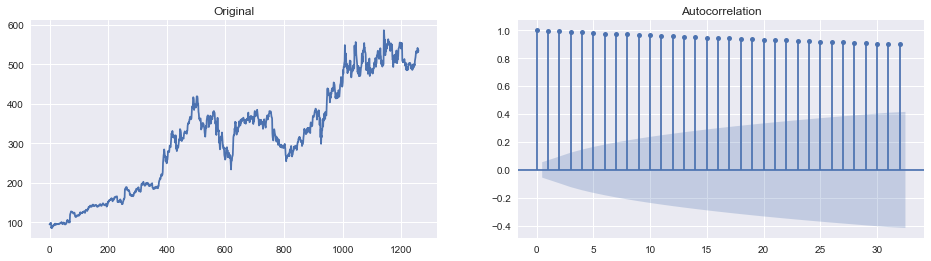

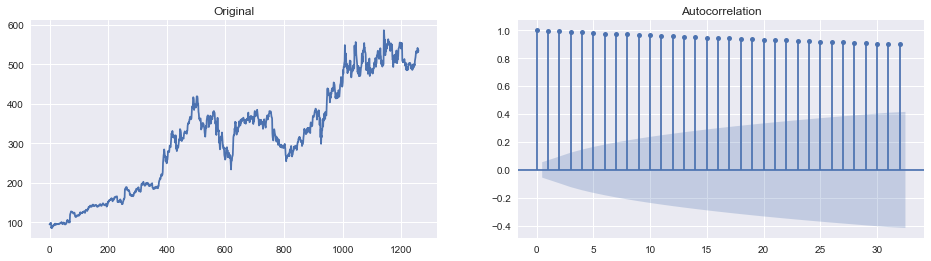

In [45]:
fig , (ax1,ax2) = plt.subplots(1, 2, figsize = (16,4))

ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close, ax=ax2)

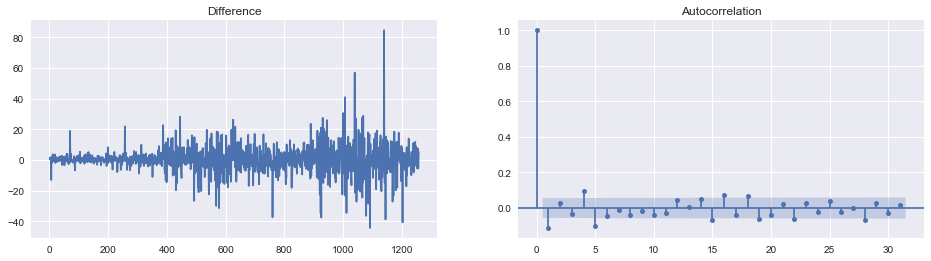

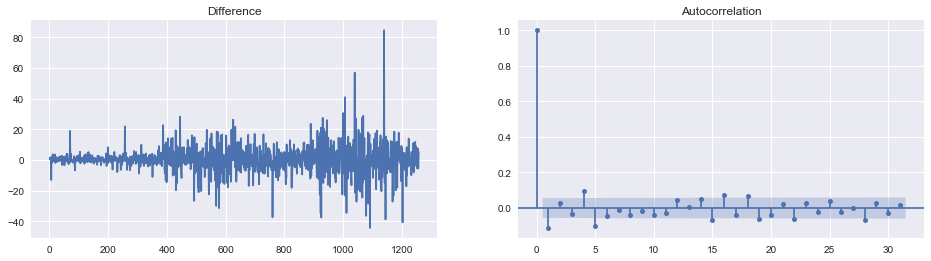

In [46]:
diff = df.Close.diff().dropna()

fig , (ax1,ax2) =plt.subplots(1, 2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Difference")
plot_acf(diff, ax=ax2)

In [13]:
!pip install pmdarima

  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\hp\\anaconda3\\Lib\\site-packages\\~tatsmodels\\tsa\\kalmanf\\kalman_loglike.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\hp\anaconda3\python.exe -m pip install --upgrade pip' command.


In [47]:
from pmdarima.arima.utils import ndiffs


In [48]:
ndiffs(df.Close, test="adf")

1

In [18]:
#so the difference =d is 1

In [49]:
from statsmodels.graphics.tsaplots import plot_pacf


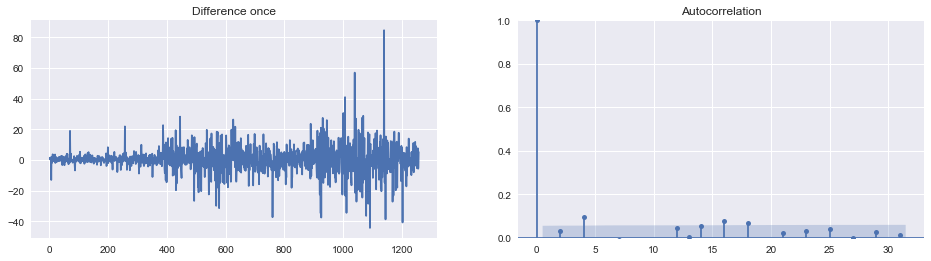

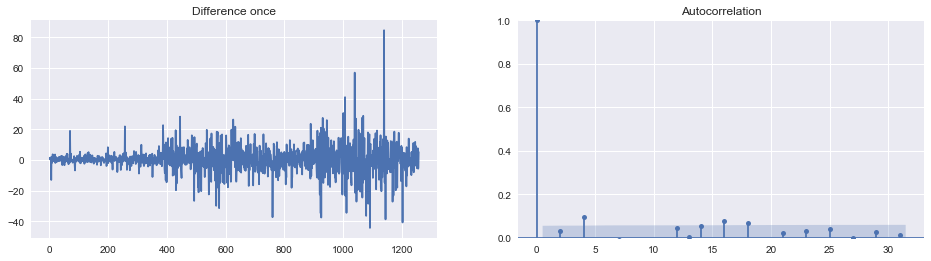

In [50]:
diff = df.Close.diff().dropna()

fig , (ax1,ax2) =plt.subplots(1, 2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2)

In [51]:
ts = df.Close
ts_log = np.log(ts)
print(type(ts_log))

<class 'pandas.core.series.Series'>


In [56]:
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plot

size = int(len(ts_log)-100)# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(4, 1, 1))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]

    
        
    original_value = test_arima[size + t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'red')
plot.plot(test_day, originals, color = 'blue')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

Printing Predicted vs Expected Values...




C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


KeyboardInterrupt: 